In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CC final join.csv")

In [ ]:
#Drop duplicated values
df.drop_duplicates(subset = ['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'age',
       'years_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members', 'tenure_period',
       'target'],inplace = True)
df.shape

(32177, 20)

In [ ]:
df.describe()

,id,cnt_children,amt_income_total,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,tenure_period,age,years_employed,target
count,3.217700e+04,32177.000000,3.217700e+04,32177.0,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.431395,1.858457e+05,1.0,0.225285,0.295180,0.089971,2.199521,26.070268,43.770929,175.837393,0.981446
std,4.181679e+04,0.745757,1.007217e+05,0.0,0.417776,0.456131,0.286145,0.914533,16.465296,11.545780,372.972737,0.134944
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,20.520000,0.050000,0.000000
25%,5.041913e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,34.120000,3.190000,1.000000
50%,5.074710e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,42.640000,6.880000,1.000000
75%,5.114631e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,53.310000,15.690000,1.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,68.910000,1000.670000,1.000000


In [ ]:
#fraud vs. normal transactions 
counts = df.target.value_counts()
Bad_Customer = counts[0]
Good_Customer = counts[1]
perc_Bad = (Bad_Customer/(Bad_Customer+Good_Customer))*100
perc_Good = (Good_Customer/(Bad_Customer+Good_Customer))*100
print('There were {} Bad Customers ({:.3f}%) and {} Good Customers ({:.3f}%).'.format(Bad_Customer, perc_Bad, Good_Customer, perc_Good))

There were 597 Bad Customers (1.855%) and 31580 Good Customers (98.145%).


Text(0.5, 0, 'Class (0:Bad Customers, 1:Good Customers)')

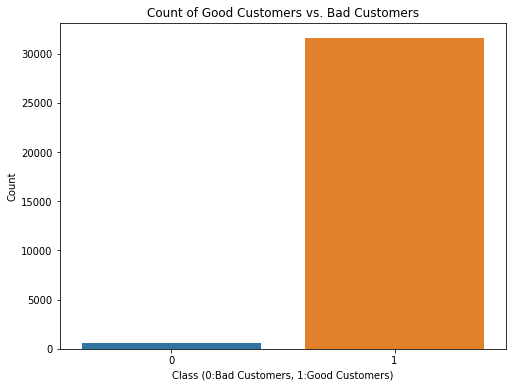

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Good Customers vs. Bad Customers')
plt.ylabel('Count')
plt.xlabel('Class (0:Bad Customers, 1:Good Customers)')

In [ ]:
#Convert binary categorical columns to have integer value
df['code_gender'] = df.code_gender.apply(lambda x : 0 if x == 'M' else 1)
df['flag_own_car'] = df.flag_own_car.apply(lambda x : 0 if x == 'N' else 1)
df['flag_own_realty'] = df.flag_own_realty.apply(lambda x : 0 if x == 'N' else 1)
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,tenure_period,age,years_employed,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,15,32.89,12.44,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,14,32.89,12.44,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,29,58.83,3.11,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,4,52.36,8.36,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,26,52.36,8.36,1


In [ ]:
bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']
df['income_bin'] = pd.cut(df['amt_income_total'], bins = bins, labels = labels)
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,tenure_period,age,years_employed,target,income_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,15,32.89,12.44,1,1600000
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,14,32.89,12.44,1,1600000
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,29,58.83,3.11,1,150000
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,4,52.36,8.36,1,300000
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,26,52.36,8.36,1,300000


In [ ]:
bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
labels = ['27','30','35','40','45','50','55','62','70']
df['age_bin'] = pd.cut(df['age'], bins = bins,labels = labels)
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,tenure_period,age,years_employed,target,income_bin,age_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,15,32.89,12.44,1,1600000,35
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,14,32.89,12.44,1,1600000,35
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,29,58.83,3.11,1,150000,62
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,4,52.36,8.36,1,300000,55
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,26,52.36,8.36,1,300000,55


In [ ]:
#Replacing all the EMP_YEARS for all pensioners to be -1.
df[(df['years_employed'] >1000) & (df.name_income_type == 'Pensioner')].shape

(5461, 22)

In [ ]:
df['years_employed'] = df.years_employed.apply(lambda x : -1 if x>1000 else x)

In [ ]:
bins = [-2, -1,  5, 10, 15,  20, 50]
labels = ['retired','5','10','15','20','20+']
df['emp_years_bin'] = pd.cut(df['years_employed'], bins = bins, labels = labels)
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,tenure_period,age,years_employed,target,income_bin,age_bin,emp_years_bin
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,15,32.89,12.44,1,1600000,35,15
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2,14,32.89,12.44,1,1600000,35,15
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,29,58.83,3.11,1,150000,62,5
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,4,52.36,8.36,1,300000,55,10
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,26,52.36,8.36,1,300000,55,10


Data preparation for Model training

In [ ]:
cust_data_train =df[[ 'code_gender', 'flag_own_car', 'flag_own_realty','name_income_type', 'name_education_type',
                             'name_family_status', 'name_housing_type', 'flag_work_phone', 'flag_phone', 'flag_email',
                             'occupation_type', 'tenure_period', 'income_bin',
                             'emp_years_bin', 'age_bin', 'target']]

In [ ]:
def creatingDummyVariables(df, columns) :
    # Creating a dummy variable for some of the categorical variables and dropping the first one.
    dummy1 = pd.get_dummies(df[columns], drop_first=True)
    
    # Adding the results to the master dataframe
    df1 = pd.concat([df, dummy1], axis=1)
    
    #Dropping the initial column
    df1.drop(columns, axis = 1, inplace = True)
    
    return df1

In [ ]:
cust_data_train = creatingDummyVariables(cust_data_train, ['name_income_type', 'name_education_type', 'name_family_status','name_housing_type',
                      'occupation_type','income_bin',
                      'emp_years_bin', 'age_bin'])


In [ ]:
cust_data_train.head()

,code_gender,flag_own_car,flag_own_realty,flag_work_phone,flag_phone,flag_email,tenure_period,target,name_income_type_Pensioner,name_income_type_State servant,name_income_type_Student,name_income_type_Working,name_education_type_Higher education,name_education_type_Incomplete higher,name_education_type_Lower secondary,name_education_type_Secondary / secondary special,name_family_status_Married,name_family_status_Separated,name_family_status_Single / not married,name_family_status_Widow,name_housing_type_House / apartment,name_housing_type_Municipal apartment,name_housing_type_Office apartment,name_housing_type_Rented apartment,name_housing_type_With parents,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,income_bin_100000,income_bin_150000,income_bin_200000,income_bin_250000,income_bin_300000,income_bin_350000,income_bin_1600000,emp_years_bin_5,emp_years_bin_10,emp_years_bin_15,emp_years_bin_20,emp_years_bin_20+,age_bin_30,age_bin_35,age_bin_40,age_bin_45,age_bin_50,age_bin_55,age_bin_62,age_bin_70
0,0,1,1,1,0,0,15,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,1,1,0,0,14,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,29,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,1,1,4,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,1,1,26,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Model Building

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

X = cust_data_train.drop('target', axis=1)
y = cust_data_train['target']


In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardization replaces the values by their Z scores.
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42,stratify=y)

In [ ]:
print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)


X_shapes:
 X_train: X_test:
 (25741, 61) (6436, 61) 

Y_shapes:
 Y_train: Y_test:
 (25741,) (6436,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)
print(y_train_pred.shape)
print(y_test_pred.shape)


(25741,)
(6436,)


Model Evaluation

In [ ]:
#accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.98


In [ ]:
#Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       119
           1       0.98      1.00      0.99      6317

    accuracy                           0.98      6436
   macro avg       0.99      0.51      0.52      6436
weighted avg       0.98      0.98      0.97      6436



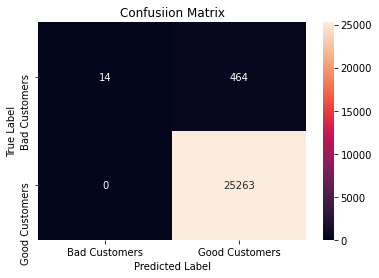

In [ ]:
cm = confusion_matrix(y_train,y_train_pred)
class_label = ["Bad Customers", "Good Customers"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_train_pred=RF.predict(X_train)
y_test_pred=RF.predict(X_test)
print(y_train_pred.shape)
print(y_test_pred.shape)


(25741,)
(6436,)


In [ ]:
#Classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.23      0.09      0.13       119
           1       0.98      0.99      0.99      6317

    accuracy                           0.98      6436
   macro avg       0.61      0.54      0.56      6436
weighted avg       0.97      0.98      0.97      6436



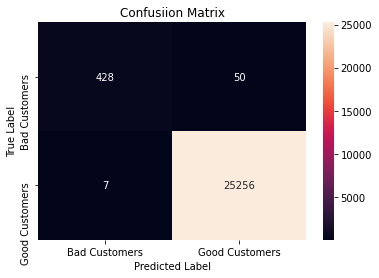

In [ ]:
cm = confusion_matrix(y_train,y_train_pred)
class_label = ["Bad Customers", "Good Customers"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, perplexity=30.0, n_iter=1500, random_state=42).fit_transform(X)

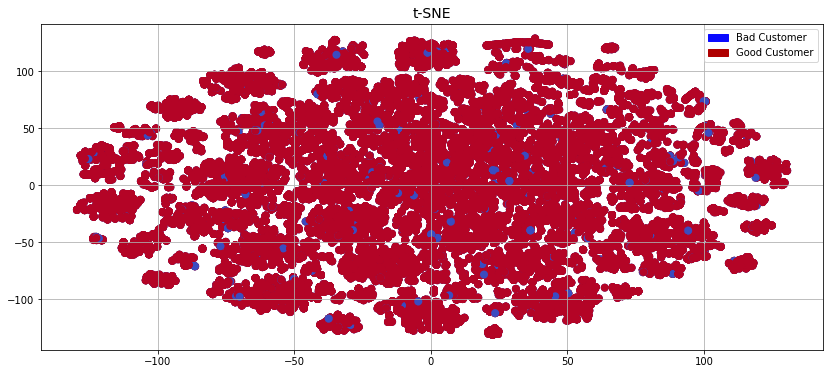

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches
f, ax = plt.subplots(figsize=(14,6))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Bad Customer')
red_patch = mpatches.Patch(color='#AF0000', label='Good Customer')
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Bad Customer', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Good Customer', linewidths=2)
ax.set_title('t-SNE', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])

t-SNE is not seperating Positive and negative points well in this data set. So the assumption will be Linear models can't perform well on this kind of data
